<a href="https://colab.research.google.com/github/S-Abhishekk/Celebal-Assignments-/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas matplotlib seaborn


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None

First 5 rows:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              

/tmp/ipython-input-7-4261312926.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='pastel')


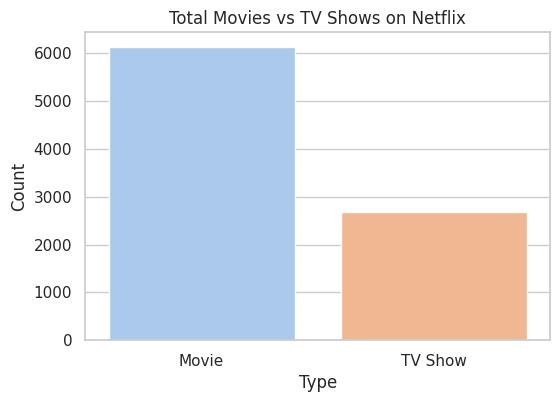

/tmp/ipython-input-7-4261312926.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year_added', data=df, palette='cool', order=sorted(df['year_added'].dropna().unique()))


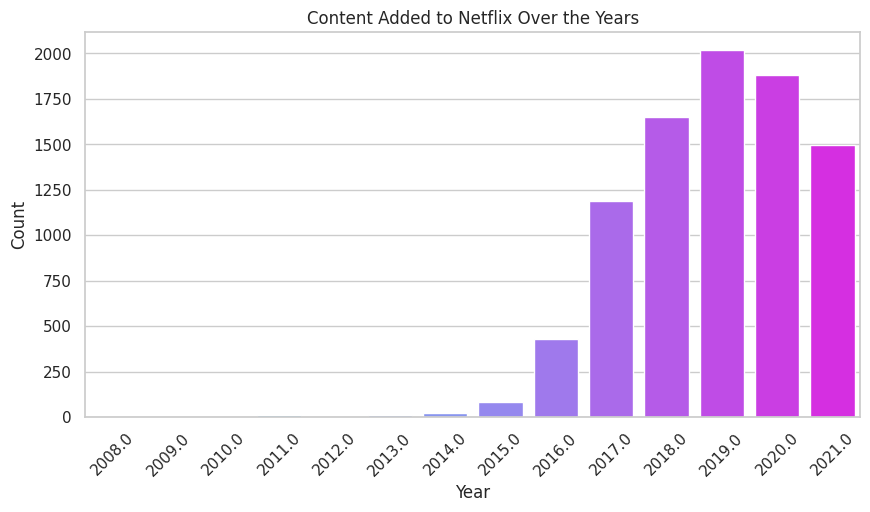

/tmp/ipython-input-7-4261312926.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')


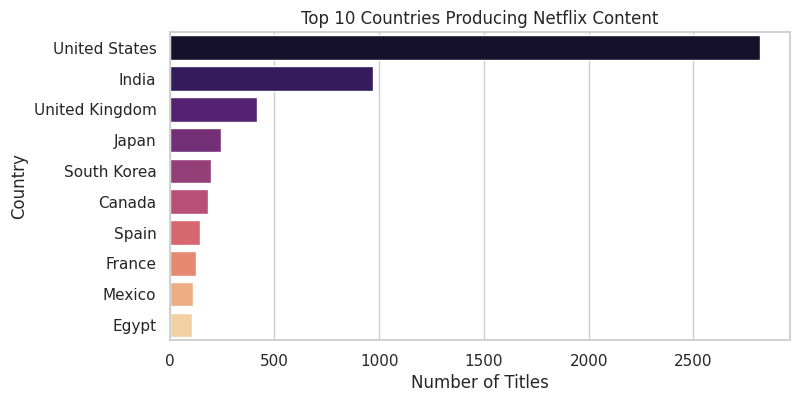

/tmp/ipython-input-7-4261312926.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='plasma')


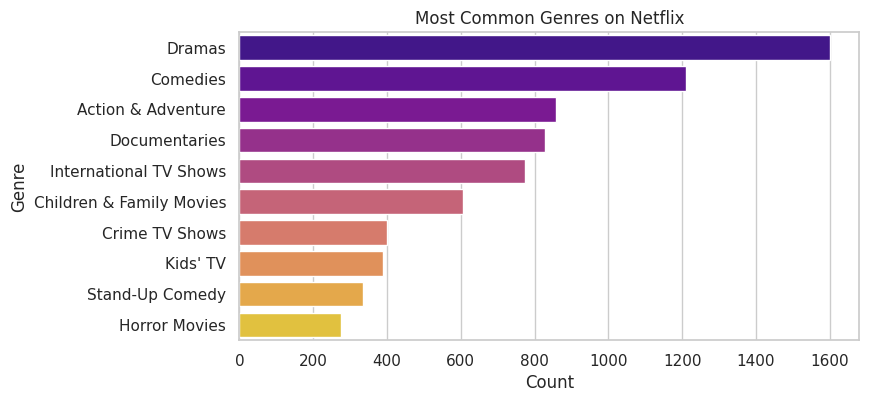

/tmp/ipython-input-7-4261312926.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index[:10], palette='Set2')


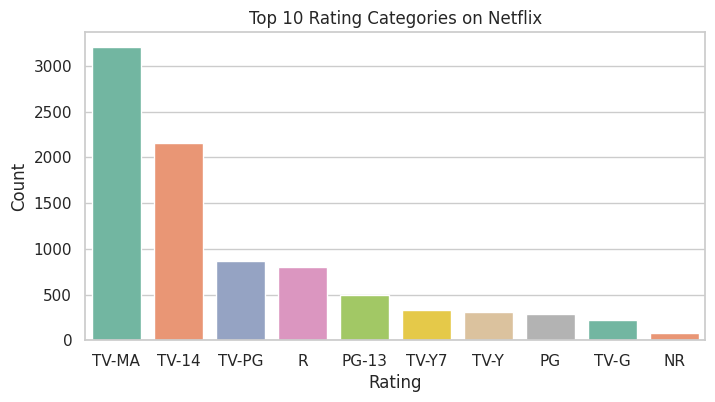

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

# 🔹 Step 1: Load the Dataset
df = pd.read_csv('netflix_titles.csv')

# Basic overview
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

# 🔹 Step 2: Data Cleaning
# Strip spaces and parse date
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')
df['year_added'] = df['date_added'].dt.year

# Extract main genre from 'listed_in'
df['genre_main'] = df['listed_in'].apply(lambda x: x.split(',')[0] if pd.notnull(x) else x)

# 🔹 Plot 1: Movies vs TV Shows
plt.figure(figsize=(6, 4))
sns.countplot(x='type', data=df, palette='pastel')
plt.title('Total Movies vs TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# 🔹 Plot 2: Content Added Over the Years
plt.figure(figsize=(10, 5))
sns.countplot(x='year_added', data=df, palette='cool', order=sorted(df['year_added'].dropna().unique()))
plt.xticks(rotation=45)
plt.title('Content Added to Netflix Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# 🔹 Plot 3: Top 10 Countries Producing Netflix Content
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(8, 4))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

# 🔹 Plot 4: Most Common Genres (Main Genre)
top_genres = df['genre_main'].value_counts().head(10)

plt.figure(figsize=(8, 4))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='plasma')
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

# 🔹 Plot 5: Ratings Distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index[:10], palette='Set2')
plt.title('Top 10 Rating Categories on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()
